## GDrive

In [ ]:
#gdrive mount
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## 1. import library

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

from tensorflow.keras.optimizers import Adam

### 2. Load Data

In [ ]:
# copy
!cp '/gdrive/MyDrive/RGB_DATA/red_data.zip' ./
!cp '/gdrive/MyDrive/RGB_DATA/blue_data.zip' ./
!cp '/gdrive/MyDrive/RGB_DATA/green_data.zip' ./

In [ ]:
# unzip
!unzip red_data.zip
!unzip blue_data.zip
!unzip green_data.zip

### 3. Data Processing

In [ ]:
red_count = len(os.listdir('red_data'))
red_count

7018

In [ ]:
# red_data
red_tmp = glob('red_data/*.jpeg')
print(len(red_tmp))

red_list = []
for img in red_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 64
    h = 128
    x = 64
    w = 128
    crop_img = img[y: y + h, x: x + w]

    red_list.append(crop_img)

red_data = np.array(red_list) # red label = 0
red_data.shape

7018


(7018, 128, 128, 3)

In [ ]:
red_train, red_test = train_test_split(red_data, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
green_count = len(os.listdir('green_data'))
green_count

7018

In [ ]:
# green_data
green_tmp = glob('green_data/*.jpeg')
print(len(green_tmp))

green_list = []
for img in green_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 64
    h = 128
    x = 64
    w = 128
    crop_img = img[y: y + h, x: x + w]

    green_list.append(np.array(crop_img))

green_data = np.array(green_list) # green label = 1, 이후에..
green_data.shape

7018


(7018, 128, 128, 3)

In [ ]:
green_train, green_test = train_test_split(green_data, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
blue_count = len(os.listdir('blue_data'))
blue_count

7018

In [ ]:
# blue_data
blue_tmp = glob('blue_data/*.jpeg')
print(len(blue_tmp))

blue_list = []
for img in blue_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 64
    h = 128
    x = 64
    w = 128
    crop_img = img[y: y + h, x: x + w]

    blue_list.append(crop_img)

blue_data = np.array(blue_list) # blue label = 2, 이후에..
blue_data.shape

7018


(7018, 128, 128, 3)

In [ ]:
blue_train, blue_test = train_test_split(blue_data, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
len(red_train)

6316

### 4. Labeling

In [ ]:
# red train, test label
red_train_label = np.zeros(len(red_train))
red_test_label = np.zeros(len(red_test))

# green train, test label
green_train_label = np.zeros(len(green_train))
for i in range(len(green_train)):
  green_train_label[i] = 1

green_test_label = np.zeros(len(green_test))
for i in range(len(green_test)):
  green_test_label[i] = 1

# blue train, test label
blue_train_label = np.zeros(len(blue_train))
for i in range(len(blue_train)):
  blue_train_label[i] = 2

blue_test_label = np.zeros(len(blue_test))
for i in range(len(blue_test)):
  blue_test_label[i] = 2

print(red_train_label.shape)
print(green_train_label.shape)
print(blue_train_label.shape)

print(red_test_label.shape)
print(green_test_label.shape)
print(blue_test_label.shape)

(6316,)
(6316,)
(6316,)
(702,)
(702,)
(702,)


In [ ]:
# 데이터 합쳐서 train, test set 만들기
# 데이터 합치기
X = np.concatenate([red_train, green_train, blue_train])
y = np.concatenate([red_train_label, green_train_label, blue_train_label])

X_test = np.concatenate([red_test, green_test, blue_test])
y_test = np.concatenate([red_test_label, green_test_label, blue_test_label])

print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(18948, 128, 128, 3)
(18948,)
(2106, 128, 128, 3)
(2106,)


In [ ]:
from tensorflow.keras.utils import to_categorical
num_classes=3

y = to_categorical(y, num_classes)
y_test = to_categorical(y_test, num_classes)

### 5. CNN model

In [ ]:
cnn_model = keras.Sequential()
cnn_model.add(Input(shape=(128, 128, 3)))
#cnn_model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
cnn_model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
cnn_model.add(MaxPooling2D((2, 2), padding="same"))

cnn_model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
#cnn_model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
cnn_model.add(MaxPooling2D((2, 2), padding="same"))

cnn_model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
#cnn_model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
cnn_model.add(MaxPooling2D((2, 2), padding="same"))

cnn_model.add(Flatten())
#cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dense(num_classes, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)     

In [ ]:
batch_size = 16
epoches = 100

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping( monitor='val_loss', patience=50)
hist = cnn_model.fit(X, y, epochs=epoches, batch_size=16, validation_split=0.1, shuffle=True, callbacks=[early_stopping])

Epoch 1/100
1066/1066 [==============================] - 81s 75ms/step - loss: 0.0456 - accuracy: 0.9868 - val_loss: 0.0693 - val_accuracy: 0.9805
Epoch 2/100
1066/1066 [==============================] - 82s 77ms/step - loss: 0.0213 - accuracy: 0.9948 - val_loss: 0.0207 - val_accuracy: 0.9974
Epoch 3/100
1066/1066 [==============================] - 79s 74ms/step - loss: 0.0422 - accuracy: 0.9901 - val_loss: 0.0161 - val_accuracy: 0.9968
Epoch 4/100
1066/1066 [==============================] - 80s 75ms/step - loss: 0.0157 - accuracy: 0.9961 - val_loss: 0.0065 - val_accuracy: 0.9995
Epoch 5/100
1066/1066 [==============================] - 80s 75ms/step - loss: 0.0111 - accuracy: 0.9974 - val_loss: 0.0073 - val_accuracy: 0.9984
Epoch 6/100
1066/1066 [==============================] - 80s 75ms/step - loss: 0.0172 - accuracy: 0.9965 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 7/100
1066/1066 [==============================] - 80s 75ms/step - loss: 0.0168 - accuracy: 0.9970 - val_loss: 0

### 6. Result

In [ ]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)

66/66 - 2s - loss: 0.0155 - accuracy: 0.9991 - 2s/epoch - 25ms/step


In [ ]:
y_prob = cnn_model.predict(X_test, verbose=0) 
predicted = y_prob.argmax(axis=-1)

In [ ]:
predicted

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
y_test_label = np.concatenate([red_test_label, green_test_label, blue_test_label])

In [ ]:
from sklearn import metrics

print('Accuracy:',metrics.accuracy_score(y_test_label, predicted))
print("")
print(metrics.confusion_matrix(y_test_label, predicted))
print("")
print('Precision:',metrics.precision_score(y_test_label, predicted, average=None))
print("")
print('Recall:',metrics.recall_score(y_test_label, predicted, average=None))
print("")
print('F1:',metrics.f1_score(y_test_label, predicted, average=None))

Accuracy: 0.9990503323836657

[[701   1   0]
 [  0 702   0]
 [  0   1 701]]

Precision: [1.         0.99715909 1.        ]

Recall: [0.9985755 1.        0.9985755]

F1: [0.99928724 0.99857752 0.99928724]


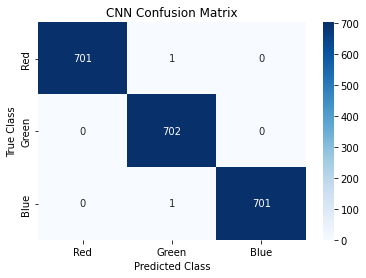

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
conf_matrix = metrics.confusion_matrix(y_test_label, predicted)
LABELS = ['Red', 'Green', 'Blue']

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

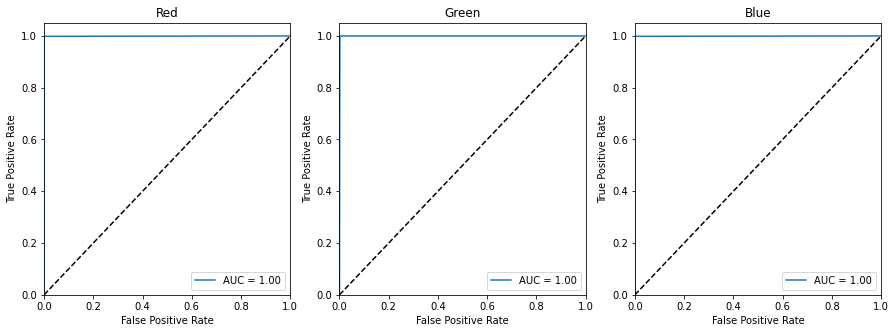

roc_auc_score:  0.9992877492877493


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2]
y_test = label_binarize(y_test, classes=labels)
y_pred = label_binarize(predicted, classes=labels)

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='AUC = %0.2f' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if idx == 0:
      plt.title('Red')
    elif idx == 1:
      plt.title('Green')
    elif idx == 2:
      plt.title('Blue')
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test, y_pred, multi_class='raise'))

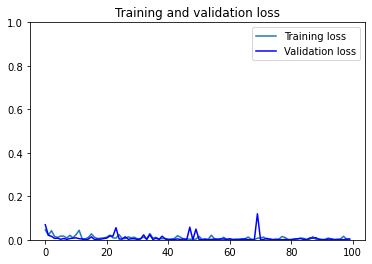

In [ ]:
# plot loss history
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))


plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

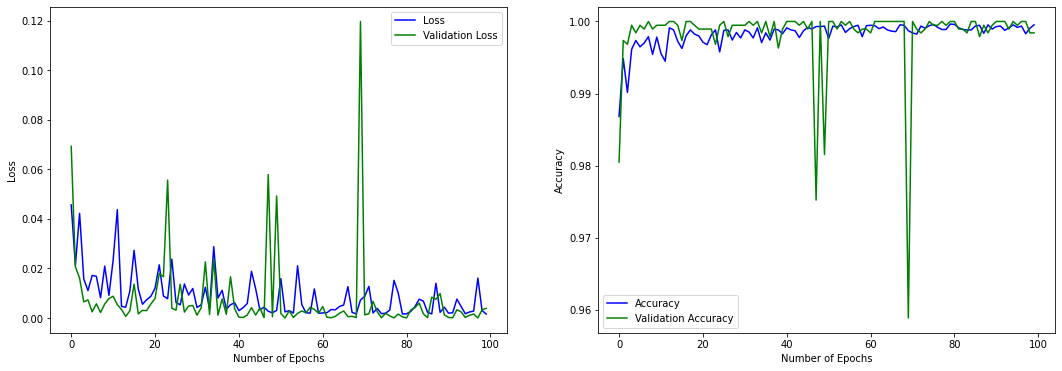

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color="blue", label = "Loss")
plt.plot(hist.history['val_loss'], color="green", label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], color="blue", label = "Accuracy")
plt.plot(hist.history['val_accuracy'], color="green", label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()

plt.show()

In [ ]:
cnn_model.save("cnn_model(2).h5")

In [ ]:
from tensorflow.keras.models import load_model

cnn_model_load = load_model("cnn_model(2).h5")

### 7. Predict Orange Pi data 

In [ ]:
! cp '/gdrive/MyDrive/RGB_DATA/실험.zip' ./
!unzip 실험.zip

In [ ]:
# 실험 데이터 가공하기
experiment_tmp = glob('./*.png')
print(len(experiment_tmp))

experiment_list = []

for img in experiment_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 96
    h = 128
    x = 56
    w = 128
    crop_img = img[y: y + h, x: x + w]
    experiment_list.append(np.array(crop_img))

experiment_image = np.array(experiment_list)

print(experiment_image.shape)

36
(36, 128, 128, 3)


In [ ]:
predict_exp_labels = cnn_model.predict(experiment_image, verbose=0) 
predicted_exp = predict_exp_labels.argmax(axis=-1)
print(predicted_exp)
predicted_exp.shape

[2 2 0 2 1 0 2 2 1 0 1 1 0 0 1 2 2 2 0 0 1 2 1 0 2 2 2 1 0 0 1 2 2 0 1 0]


(36,)

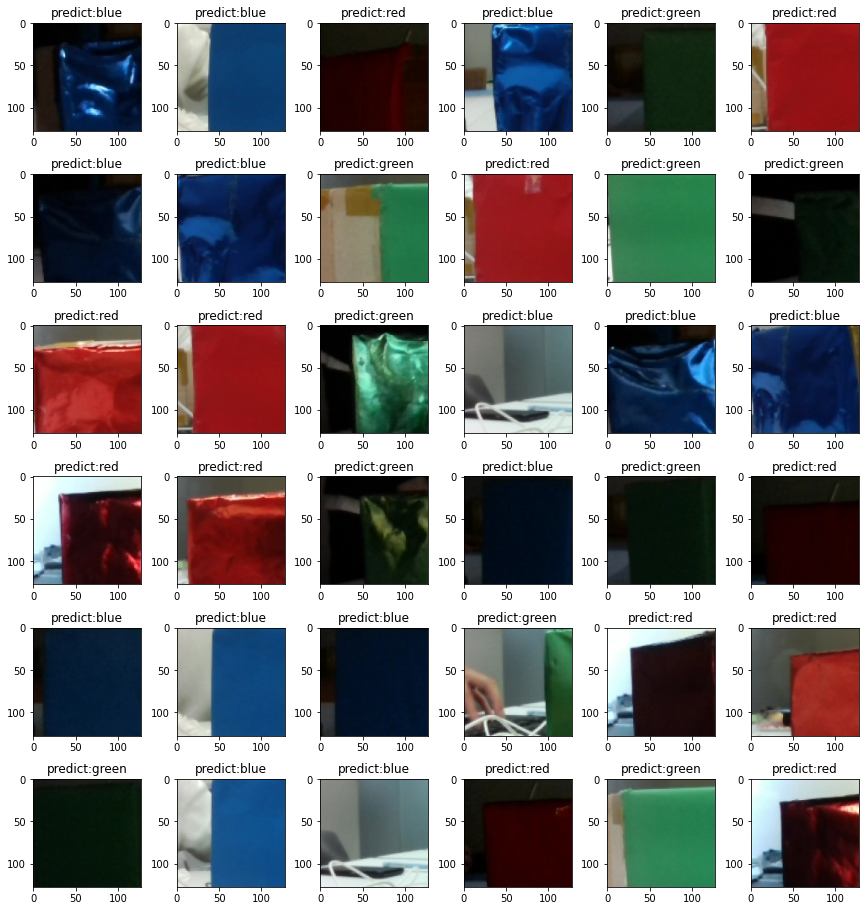

In [ ]:
plt.figure(figsize=(15,15))
for i in range(36):
  plt.subplot(6,6,i+1)
  if predicted_exp[i] == 0:
    predict_colors = 'red'
  elif predicted_exp[i] == 1:
    predict_colors = 'green'
  elif predicted_exp[i] == 2:
    predict_colors = 'blue'
  else :
    predict_colors = 'none'

  plt.title("predict:%s"%predict_colors)
  plt.imshow(experiment_image[i])
  plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)

plt.show()